#### MNIST Hand-written Number Classification using Convolutional Neural Network

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

##### Import Dataset

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train/255, X_test/255

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train=y_train.reshape(-1,)

9


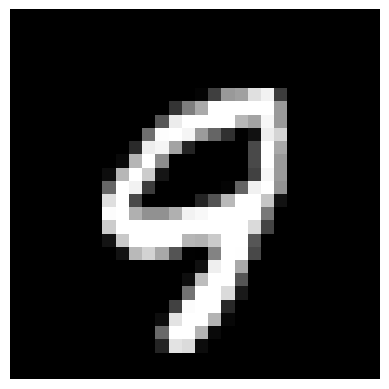

In [5]:
index = 42069
print(y_train[index])
plt.imshow(X_train[index], cmap=plt.cm.binary_r)
plt.axis('off')
plt.show()

##### CNN

In [15]:
cnn = models.Sequential([

    # CNN
    layers.Conv1D(filters=128, kernel_size=(3), activation='relu', input_shape=(28,28)),
    layers.MaxPooling1D((2)),

    layers.Conv1D(filters=64, kernel_size=(3), activation='relu', input_shape=(28,28)),
    layers.MaxPooling1D((2)),
    
    # Dense Layers
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['Accuracy'])                                          

##### Train the CNN

In [17]:
history = cnn.fit(X_train, y_train, validation_split=0.15, epochs=5)

Epoch 1/5
1594/1594 [==============================] - 6s 3ms/step - loss: 0.2310 - Accuracy: 0.9312 - val_loss: 0.0873 - val_Accuracy: 0.9749
Epoch 2/5
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0771 - Accuracy: 0.9757 - val_loss: 0.0785 - val_Accuracy: 0.9788
Epoch 3/5
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0558 - Accuracy: 0.9828 - val_loss: 0.0613 - val_Accuracy: 0.9826
Epoch 4/5
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0438 - Accuracy: 0.9860 - val_loss: 0.0574 - val_Accuracy: 0.9828
Epoch 5/5
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0328 - Accuracy: 0.9897 - val_loss: 0.0511 - val_Accuracy: 0.9842


In [18]:
print(history.history.keys())
Accuracy, val_Accuracy = np.array(history.history['Accuracy']) * 100, np.array(history.history['val_Accuracy']) * 100
Accuracy, val_Accuracy

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])


(array([93.12157035, 97.56666422, 98.28039408, 98.60392213, 98.97058606]),
 array([97.48888612, 97.87777662, 98.25555682, 98.27777743, 98.42222333]))

##### Plot Accuracy and Loss

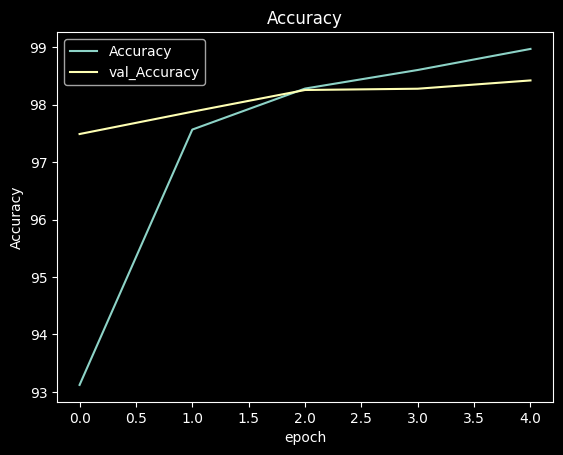

In [19]:
plt.style.use('dark_background')
plt.plot(Accuracy)
plt.plot(val_Accuracy)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')

plt.ticklabel_format(style='plain')
plt.legend(['Accuracy', 'val_Accuracy'])
plt.show()

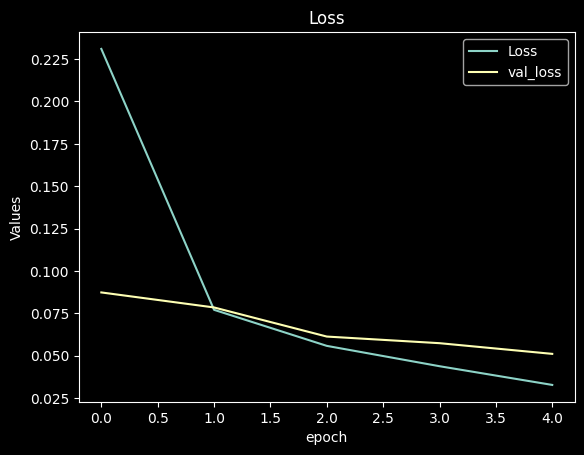

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
#plt.yscale('log')
plt.ylabel('Values')
plt.xlabel('epoch')

plt.legend(['Loss', 'val_loss'])
plt.show()

In [21]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0429 - Accuracy: 0.9844


[0.042932845652103424, 0.9843999743461609]

##### Classification Report

In [22]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 1ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.96      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [23]:
prediction = cnn.predict(X_test)

313/313 [==============================] - 0s 1ms/step


##### Plot Confusion Matrix

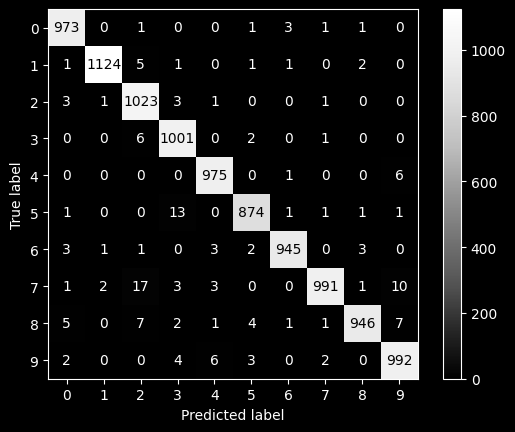

In [24]:
predLabels = np.argmax(prediction, axis=1)
cm = confusion_matrix(y_test, predLabels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Greys_r)